In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/HR_train_promotion.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/HR_test_promotion.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
test.shape

(23490, 13)

In [6]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
test_missing = test.isnull().sum()/len(test)*100
test_missing

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [9]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
# We can see that the distribution of age is slightly skewed to the right. 
# The mean age is around 34.8 while the median age is 33 based on the 5-number summary.

# The distribution of the length of service is also right-skewed, with the mean 5.8 years and the median 5 years.

In [12]:
# Only education and previous year rating have missing values.
# We will remove/drop the missing values in both train and test set since 
# the number of rows that will be removed is small in comparison with the amount of rows we have 


In [20]:
train = train.dropna()
test = test.dropna()

In [13]:
train.shape

(54808, 14)

In [14]:
test.shape

(23490, 13)

In [11]:
train_missing = train.isnull().sum()/len(train)*100
train_missing

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [16]:
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(),inplace = True)
train['education'].fillna("Bachelor's",inplace = True)

In [17]:
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(),inplace = True)
test['education'].fillna("Bachelor's",inplace = True)

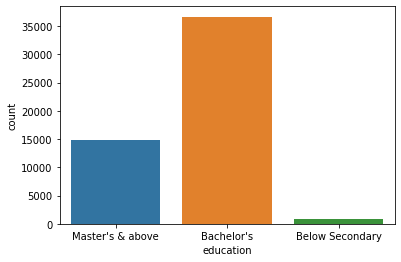

In [15]:
sns.countplot(x = 'education',data = train)

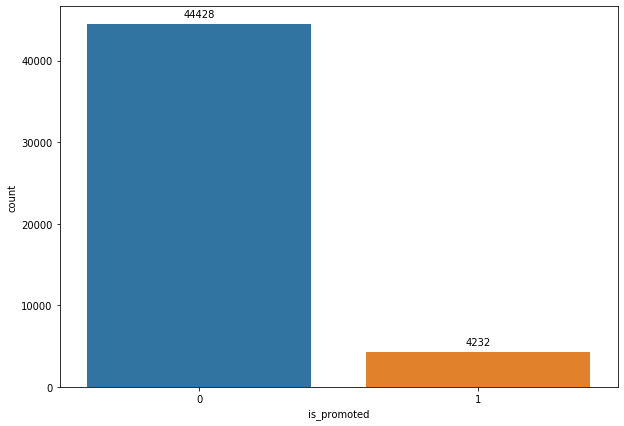

In [29]:
plt.figure(figsize = (10,7))
plot = sns.countplot(x = 'is_promoted',data = train)

for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [42]:
# Only 8.7% (4232) employees were promoted. 
# Or simply promotion rate is 8.7%

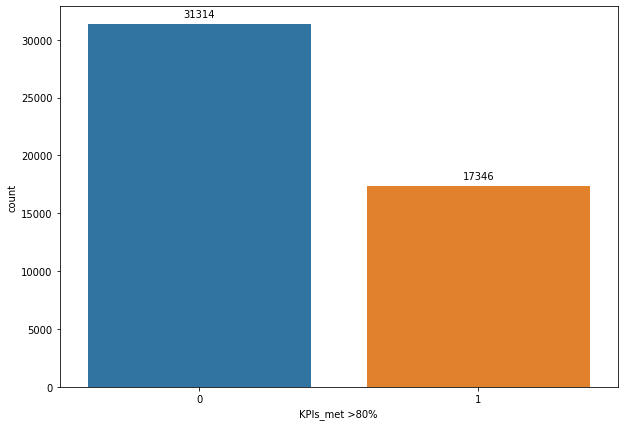

In [28]:
plt.figure(figsize = (10,7))
plot_KPI = sns.countplot(x = 'KPIs_met >80%',data = train)

for p in plot_KPI.patches:
    plot_KPI.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

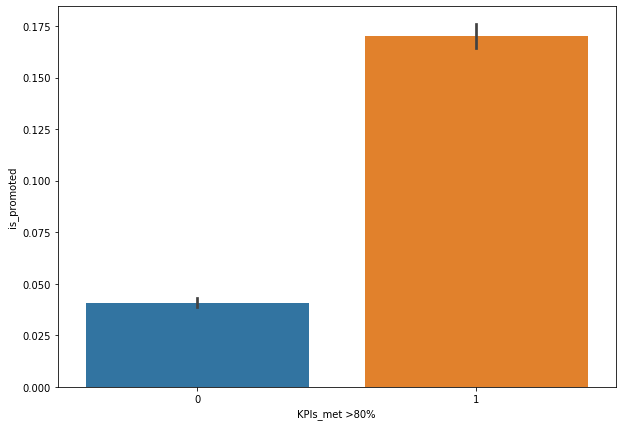

In [31]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'KPIs_met >80%',y = 'is_promoted',data = train)

In [32]:
# Clearly there's high chance of being promoted when KPI is more than 80%

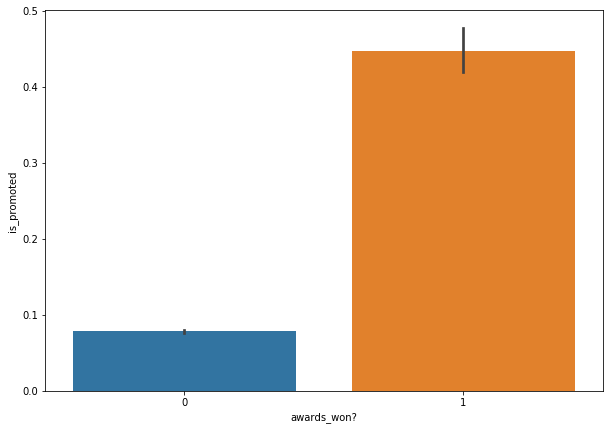

In [33]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'awards_won?',y = 'is_promoted',data = train)

In [52]:
# high chances of promotion when award is won

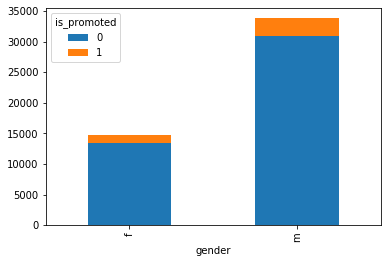

In [58]:
gender_plot = pd.crosstab(train['gender'], train['is_promoted'])
gender_plot.plot(kind='bar', stacked=True)

In [47]:
# higher promotion rate for Males than Females

<Figure size 720x504 with 0 Axes>

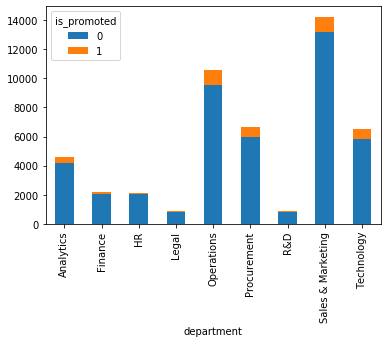

In [60]:
plt.figure(figsize=(10,7))
department_plot = pd.crosstab(train['department'], train['is_promoted'])
department_plot.plot(kind='bar', stacked=True)

In [61]:
# High promotion rate in Sales&Marketing,Operations and Procurement

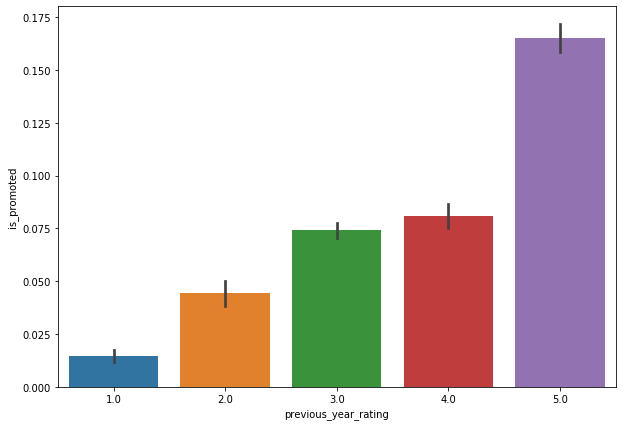

In [34]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'previous_year_rating',y = 'is_promoted',data = train)

In [35]:
# Clearly the higher the previous year rating( =>3 ) the higher the chances of being promoted

In [20]:
# Let's create variables high rating(>=3) and low rating(<3)

train['high_previous_rating'] = np.where(train['previous_year_rating'] >=3,1,0 )
train['low_previous_rating'] = np.where(train['previous_year_rating'] < 3,1,0 )
train = train.drop('previous_year_rating',axis = 1)

In [21]:
test['high_previous_rating'] = np.where(test['previous_year_rating'] >=3,1,0 )
test['low_previous_rating'] = np.where(test['previous_year_rating'] < 3,1,0 )
test = test.drop('previous_year_rating',axis = 1)

<Figure size 720x504 with 0 Axes>

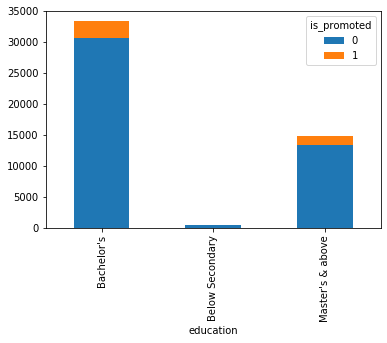

In [62]:
plt.figure(figsize=(10,7))
edu_plot = pd.crosstab(train['education'], train['is_promoted'])
edu_plot.plot(kind='bar', stacked=True)

In [63]:
# Higher chances of promotion among Bachelor's and Masters

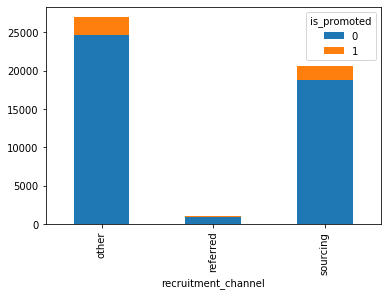

In [64]:
channel_plot = pd.crosstab(train['recruitment_channel'], train['is_promoted'])
channel_plot.plot(kind='bar', stacked=True)

In [67]:
# From all the variables there's clearly no bias linking promotion rate

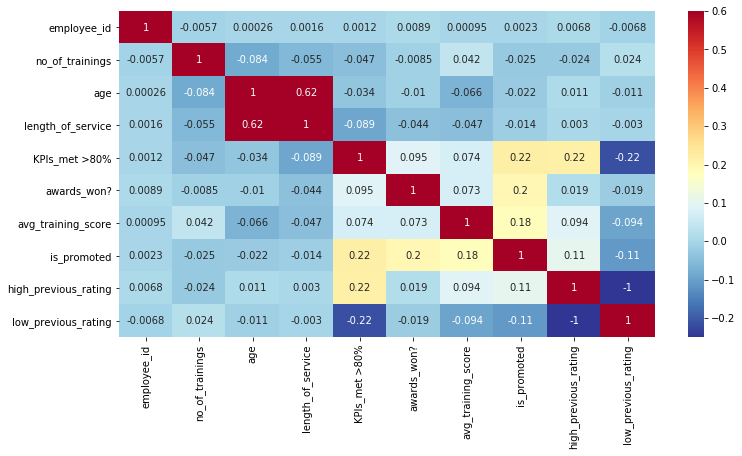

In [69]:
plt.figure(figsize =(12,6))
sns.heatmap(train.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [70]:
# The variables with the highest correlation (0.22 and 0.20 respectively) 
# is whether the KPI is met and whether an award was won

In [71]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,high_previous_rating,low_previous_rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,8,1,0,49,0,1,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,4,0,0,60,0,1,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,7,0,0,50,0,1,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,10,0,0,50,0,0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,2,0,0,73,0,1,0


In [24]:
#----------------------Feature engineering--------------

# Let's add another variable that states if an employee has won both awards and met KPI.

train['KPI_Award'] = np.where(((train['KPIs_met >80%']==1) & (train['awards_won?']==1)),1,0)
test['KPI_Award'] = np.where(((test['KPIs_met >80%']==1) & (test['awards_won?']==1)),1,0)

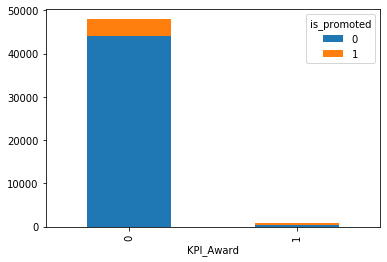

In [74]:
kpiaward_plot = pd.crosstab(train['KPI_Award'], train['is_promoted'])
kpiaward_plot.plot(kind='bar', stacked=True)

In [25]:
# Let's drop the variable we won't need, also guided by the correlation heatmap

train = train.drop(['employee_id','region','gender','recruitment_channel','length_of_service','no_of_trainings'],axis=1)
test = test.drop(['region','gender','recruitment_channel','length_of_service','no_of_trainings'],axis=1)

In [26]:
# Encode categorical variables

train = pd.get_dummies(train,columns = ['department','education'])
test = pd.get_dummies(test,columns = ['department','education'])

In [27]:
train.head()

,age,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,high_previous_rating,low_previous_rating,KPI_Award,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above
0,35,1,0,49,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,30,0,0,60,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,34,0,0,50,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,39,0,0,50,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,45,0,0,73,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [28]:
test.head()

,employee_id,age,KPIs_met >80%,awards_won?,avg_training_score,high_previous_rating,low_previous_rating,KPI_Award,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above
0,8724,24,1,0,77,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,74430,31,0,0,51,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,72255,31,0,0,47,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,38562,31,0,0,65,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,64486,30,0,0,61,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn import preprocessing


#Classification Algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score, recall_score, classification_report, confusion_matrix

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
import xgboost 
from xgboost import XGBClassifier

In [35]:
X = train.drop('is_promoted',axis=1)
y = train['is_promoted']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [37]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

93.24940704251048

In [38]:
# Neural Network

nnt = MLPClassifier()
nnt.fit(X_train,y_train)
nnt.score(X_test,y_test)*100

93.88189503132031

In [39]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

94.119078027124

In [40]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

92.93316304810557

In [41]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100

92.79328589673416

In [61]:
# XG Boost 

xgb = XGBClassifier(learning_rate=0.1,gamma=0.4,subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)*100

94.26503679377242

In [62]:
# F1 score for XGB

y_pred = xgb.predict(X_test)
f1_score(y_test, y_pred,average="macro")

0.7428404168600107

In [63]:
# XGBoost would be the model chosen due to the highest Test-set F1 score and highest accuracy

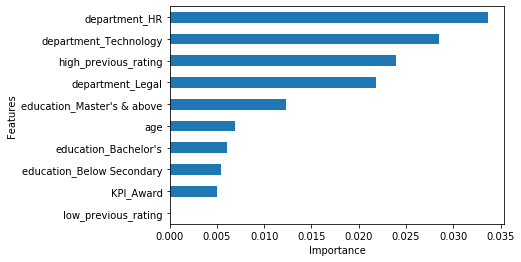

In [45]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(10).plot(kind='barh')
importances = xgb.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

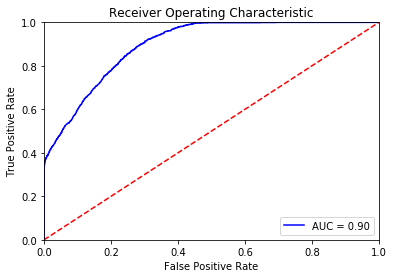

In [46]:
probs = xgb.predict_proba(X_test)  #for XGB
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
employee_id = pd.DataFrame(test.employee_id)

In [48]:
test = test.drop('employee_id',axis = 1)

In [49]:
y_final = xgb.predict(test)

#Submission
submission = pd.DataFrame({
        "employee_id": employee_id["employee_id"],
        "is_promoted": y_final
    })
submission.head()
submission.to_csv('Employee_Promotion.csv', index=False)